## Imports and dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import nonzero
# plt.rcParams.update({'text.usetex':False})

import flavio
import flavio.plots
import pandas as pd

import matplotlib.ticker as tck

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

from sklearn.metrics import r2_score, accuracy_score

In [2]:
tqdm.pandas()

In [3]:
# Functions
def compute_J_from_vec(vec, wilson_coef=None):
    obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
    
    if wilson_coef is None:
        print("Setting wilson to sm...")
        #This is the SM
        wilson_coef = flavio.WilsonCoefficients()
        wilson_coef.set_initial({'C9_bsmumu' : 0., 'C10_bsmumu' : 0.}, scale = 100)

    si = {obs: flavio.np_prediction('%s(B0->K*mumu)' % obs, wilson_coef, vec['q2']) for obs in obs_si}

    return compute_J(si, vec['k'], vec['l'], vec['p'])


def compute_J(si, k, l, p):
    ''' Computes the differential branching factor 
    
    si : dict
        dictionary of all S_i terms
    k : float
        theta_k
    l : float
        theta l
    p : float
        phi
    '''

    fl =  3/4*(1 - si['FL']) * (np.sin(k) ** 2) + si['FL'] * (np.cos(k) ** 2) + 1/4 * (1 - si['FL']) * (np.sin(k) ** 2) * np.cos(2*l) - si['FL'] * (np.cos(k) ** 2) * np.cos(2*l)
    s3 = si['S3'] * (np.sin(k) ** 2) * (np.sin(l) ** 2) * np.cos(2 * p)
    s4 = si['S4'] * np.sin(2 * k) * np.sin(2*l) * np.cos(p)
    s5 = si['S5'] * np.sin(2 * k) * np.sin(l) * np.cos(p)
    afb = 4/3 * si['AFB'] * (np.sin(k) ** 2) * np.cos(l)
    s7 = si['S7'] * np.sin(2 * k) * np.sin(l) * np.sin(p)
    s8 = si['S8'] * np.sin(2 * k) * np.sin(2 * l) * np.sin(p)
    s9 = si['S9'] * (np.sin(k) ** 2) * (np.sin(l) ** 2) * np.sin(2 * p)

    return sum([fl, s3, s4, s5, afb, s7, s8, s9])


def compute_J_from_df(df, w):
    obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
    
    # si = {obs: flavio.np_prediction('%s(B0->K*mumu)' % obs, w, df['q2']) for obs in obs_si}
    si = {}
    for o in obs_si:
        si[o] = df['q2'].apply(
            lambda q2: flavio.np_prediction(f'{o}(B0->K*mumu)', w, q2)
        )
    si = pd.DataFrame(si)
    return compute_J(si, df['k'], df['l'], df['p'])


def format_range(x, a, b):
    ''' given uniform x in range [0,1], ouptut uniform in range [a,b] '''
    return x * (b - a) + a

# Import data

In [4]:
plt.rc('text', usetex=False)

In [4]:
sm = pd.read_csv('data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)
# scenario = pd.read_csv('data/toy_data_c9_-0.46_c10_0.46_2021_10_29_13.csv', index_col=0)

In [5]:
sm.rename(columns={'J_comp':'BR_sm'}, inplace=True)

In [6]:
sm['cos_l'] = np.cos(sm['l'])
sm['cos_k'] = np.cos(sm['k'])

In [7]:
sm_low_q = sm[(sm['q2'] < 6) & (sm['q2'] > 1)]

In [8]:
sm[['q2', 'cos_l']].hist(figsize=(10,4), bins=30)


array([[<AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'cos_l'}>]], dtype=object)

RuntimeError: latex was not able to process the following string:
b'cos_l'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/oskar/.matplotlib/tex.cache/ec2743e2556cadaee41203219a6cb4ca.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2021/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2021/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2021/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2021/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2021/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2021/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2021/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2021/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ec2743e2556cadaee41203219a6cb4ca.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily cos_
                    l}
No pages of output.
Transcript written on ec2743e2556cadaee41203219a6cb4ca.log.




<Figure size 720x288 with 2 Axes>

array([[<AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'cos_l'}>]], dtype=object)

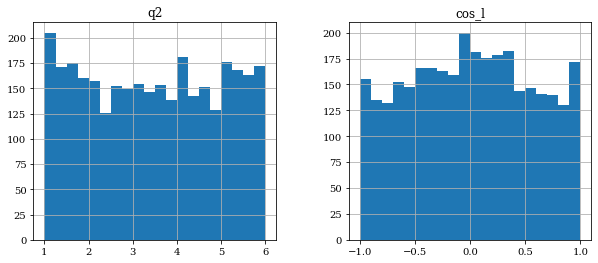

In [10]:
sm_low_q[['q2', 'cos_l']].hist(figsize=(10,4), bins=20)

In [11]:
values, edges = np.histogramdd(sm[['q2', 'l']].values, bins=20)

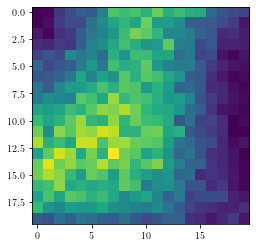

In [12]:
plt.imshow(values)

# Reweight data

In [16]:
sm = sm_low_q

In [17]:
obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']

In [18]:
wc_scenario_8 = flavio.WilsonCoefficients()

c9_busmsm = -0.46
c10_busmsm = 0.46

wc_scenario_8.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)


sm['scenario_8_w'] = compute_J_from_df(sm, wc_scenario_8) / sm['BR_sm']

In [19]:
wc_scenario_1 = flavio.WilsonCoefficients()

c9_busmsm = -1
c10_busmsm = 1

wc_scenario_1.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)
sm['scenario_1_w'] = compute_J_from_df(sm, wc_scenario_1) / sm['BR_sm']

In [20]:
wc_scenario_7 = flavio.WilsonCoefficients()

c9_busmsm = -100
c10_busmsm = 100

wc_scenario_7.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)
sm['scenario_7_w'] = compute_J_from_df(sm, wc_scenario_7) / sm['BR_sm']

In [25]:
wc_scenario_10 = flavio.WilsonCoefficients()

c9_busmsm = 0
c10_busmsm = 1

wc_scenario_10.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)
sm['scenario_10_w'] = compute_J_from_df(sm, wc_scenario_10) / sm['BR_sm']

In [26]:
wc_scenario_9 = flavio.WilsonCoefficients()

c9_busmsm = 1
c10_busmsm = 0

wc_scenario_9.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)
sm['scenario_9_w'] = compute_J_from_df(sm, wc_scenario_9) / sm['BR_sm']

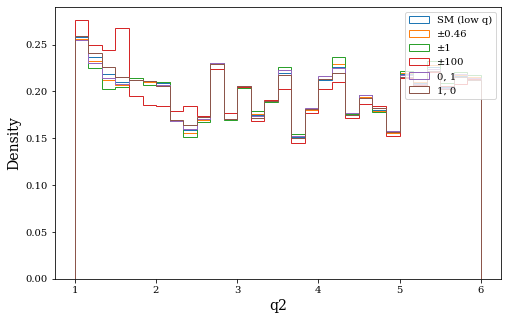

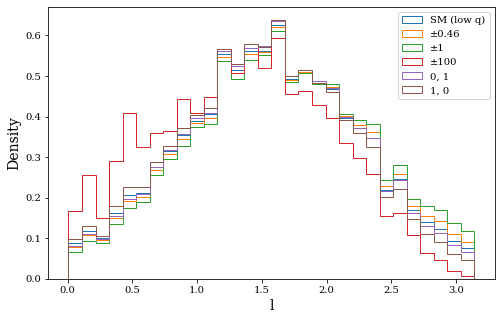

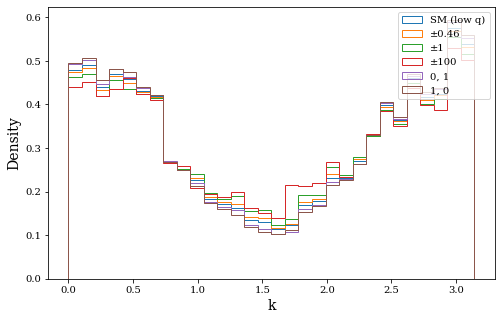

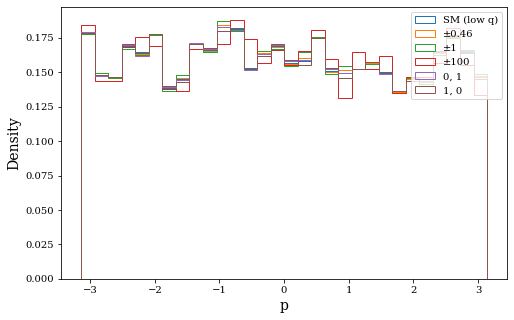

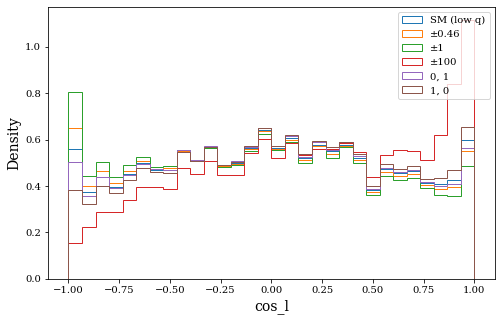

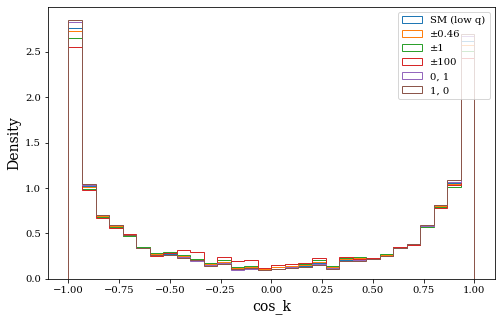

In [29]:

low_q = sm[(sm['q2'] < 6) & (sm['q2'] > 0)]

# ax.hist(sm['l'], label='SM', histtype='step', bins=30, density=True)
# ax.hist(sm['l'], label='Scenario 8', histtype='step', bins=30, density=True, weights=sm['scenario_8_w'])
for l in ['q2', 'l', 'k', 'p', 'cos_l', 'cos_k']:
    fig, ax = plt.subplots(figsize=(8,5))
    ax.hist(sm[l], label='SM (low q)', histtype='step', bins=30, density=True)
    ax.hist(sm[l], label='±0.46', histtype='step', bins=30, density=True, weights=sm['scenario_8_w'])
    ax.hist(sm[l], label='±1', histtype='step', bins=30, density=True, weights=sm['scenario_1_w'])
    ax.hist(sm[l], label='±100', histtype='step', bins=30, density=True, weights=sm['scenario_7_w'])
    ax.hist(sm[l], label='0, 1', histtype='step', bins=30, density=True, weights=sm['scenario_10_w'])
    ax.hist(sm[l], label='1, 0', histtype='step', bins=30, density=True, weights=sm['scenario_9_w'])
    plt.legend()
    plt.ylabel('Density')
    plt.xlabel(l)
    plt.show()

In [28]:
low_q['scenario_7_w']/low_q['scenario_1_w']

2        0.802414
4        0.558501
5        0.871056
8        0.875117
9        1.246028
           ...   
13363    1.347571
13364    2.207484
13369    0.748123
13370    0.821789
13374    0.653660
Length: 3167, dtype: float64

# Sampling and Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
sample_size = 1000
c9_max, c9_min = 10, -10
c10_max, c10_min = 10, -10
n_bins = 5
m_bins = 5
bin_edges_2d = [np.linspace(0,20,n_bins + 1), np.linspace(0,np.pi,m_bins + 1)]
variables = ['q2', 'l']
features_2d = [f'x{i}' for i in range(n_bins * m_bins)]
targets = ['c9', 'c10']

dataset_q2_l = pd.DataFrame(columns=features_2d + targets)

for c9, c10 in tqdm(np.random.uniform(c9_min, c9_max, (10, 2))):
    # set the random NP coefficients 
    random_coefficients = flavio.WilsonCoefficients()
    random_coefficients.set_initial({'C9_bsmumu' : c9, 'C10_bsmumu' : c10}, scale = 100)

    # generate new sample
    new_sample = sm.sample(sample_size)
    # compute weight for rescaling
    # new_J = new_sample.apply(lambda r: gauss_2d(r['x'], r['y'], a, b), axis=1)
    new_J = compute_J_from_df(new_sample, random_coefficients)
    w = new_J / new_sample['BR_sm']

    # compute weighted histogram
    values_2d, _ = np.histogramdd(new_sample[variables].values, bins=bin_edges_2d, weights=w, density=True)

    # create dataset row
    row = {c:v for c,v in zip(features_2d, values_2d.flatten())}
    row['c9'] = c9
    row['c10'] = c10
    dataset_q2_l = dataset_q2_l.append(row, ignore_index=True)

100%|██████████| 10/10 [04:20<00:00, 26.04s/it]


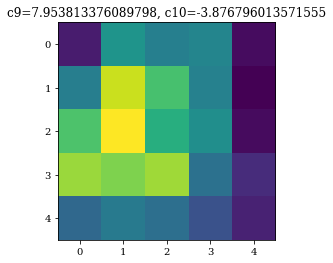

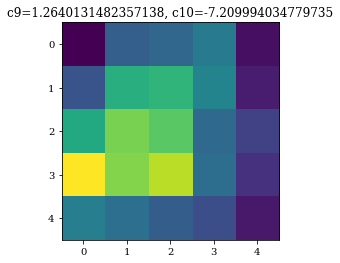

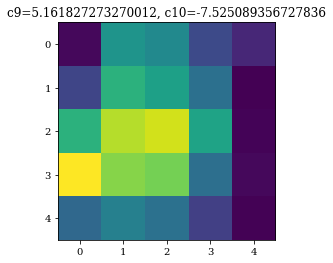

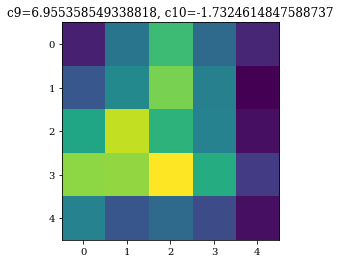

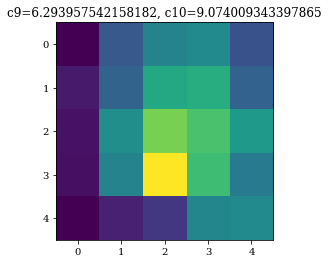

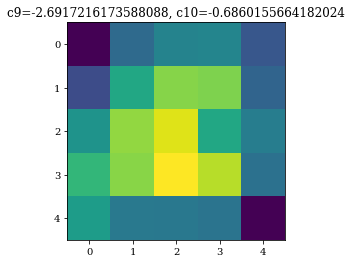

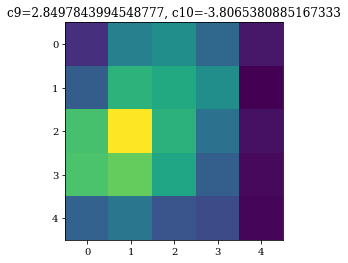

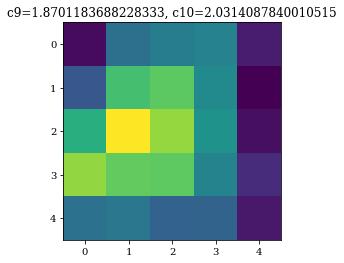

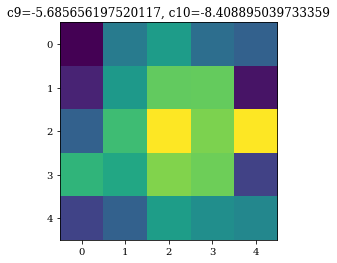

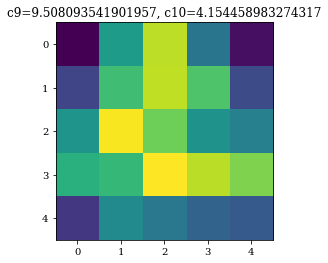

In [ ]:
for i in range(0,10):
    plt.imshow(dataset_q2_l.iloc[i,:25].values.reshape((n_bins,m_bins)))
    plt.title(f"c9={dataset_q2_l.loc[i, 'c9']}, c10={dataset_q2_l.loc[i, 'c10']}")
    plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset_q2_l[features_2d], dataset_q2_l[targets])

In [ ]:
model = MLPRegressor(max_iter=10000, hidden_layer_sizes=100, solver='adam')
model.fit(x_train, y_train)
model.score(x_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.15245132854162857

In [ ]:
dataset_q2_l.to_csv('big_ass_dataset.csv')

In [ ]:
display(dataset_q2_l)

NameError: name 'dataset_q2_l' is not defined